# Case Study - Multiclass Classification using CNN

* Importing necessary libraries

In [7]:
from PIL import Image
import numpy as np
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import tensorflow
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

* Loading train, validation and test datasets

In [8]:
train_dir = '/content/drive/MyDrive/Data/Vegetables/train'
train_dir = pathlib.Path(train_dir)
train_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/train')

In [9]:
validation_dir = '/content/drive/MyDrive/Data/Vegetables/validation'
validation_dir = pathlib.Path(validation_dir)
validation_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/validation')

In [10]:
test_dir = '/content/drive/MyDrive/Data/Vegetables/test'
test_dir = pathlib.Path(test_dir)
test_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/test')

In [11]:
Tomato = list(train_dir.glob('Tomato/*'))
Potato = list(train_dir.glob('Potato/*'))
Cucumber = list(train_dir.glob('Cucumber/*'))

* Visualizing test data

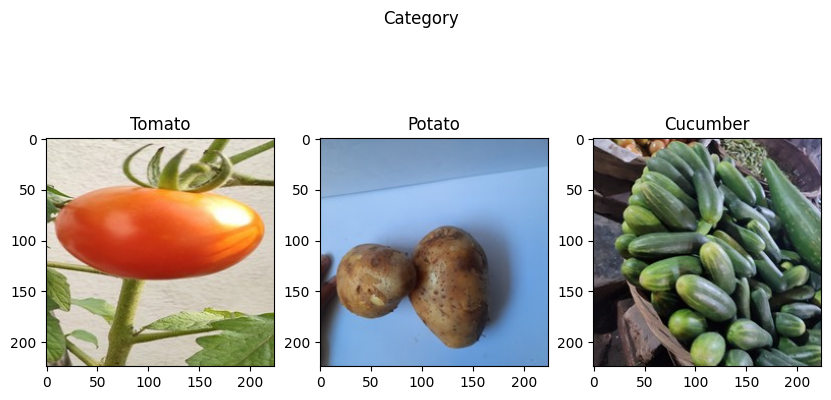

In [12]:
fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(10,5))
fig.suptitle('Category')

tomato_img = img.imread(Tomato[0])
potato_img = img.imread(Potato[0])
cucumber_img = img.imread(Cucumber[0])

ax[0].set_title('Tomato')
ax[1].set_title('Potato')
ax[2].set_title('Cucumber')

ax[0].imshow(tomato_img)
ax[1].imshow(potato_img)
ax[2].imshow(cucumber_img)

* Loading the images in train dataset to X and corresponding labels to y

In [13]:
df_images = {
    'Tomato':Tomato,
    'Potato':Potato,
    'Cucumber':Cucumber
}

df_labels = {
    'Tomato':0,
    'Potato':1,
    'Cucumber':2
}

In [14]:
X, y = [], []  # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(df_labels[label])

In [15]:
print('len(X) : ',len(X))
print('len(y) : ',len(y))

len(X) :  3000
len(y) :  3000


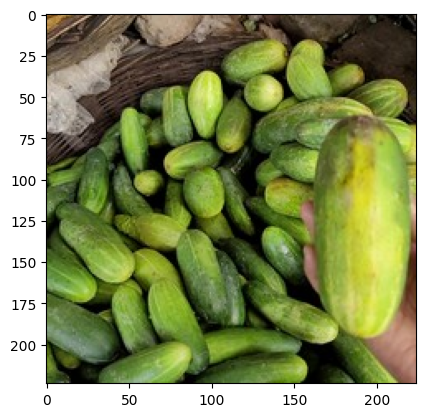

In [16]:
plt.imshow(X[-1])

In [17]:
# Standardize
X = np.array(X, dtype='float32') / 255.0
y = np.array(y)

In [18]:
print(X.shape)
print(y.shape)

(3000, 224, 224, 3)
(3000,)


In [19]:
X_train = X
y_train = to_categorical(y)

# Validation Dataset

In [20]:
# Validation Data

Tomato = list(validation_dir.glob('Tomato/*'))
Potato = list(validation_dir.glob('Potato/*'))
Cucumber = list(validation_dir.glob('Cucumber/*'))

val_images = {
    'Tomato':Tomato,
    'Potato':Potato,
    'Cucumber':Cucumber
}

val_labels = {
    'Tomato':0,
    'Potato':1,
    'Cucumber':2
}

X_val, y_val = [], []  # X = images, y = labels
for label, images in val_images.items():
    for image in images:
        img = Image.open(image)
        X_val.append(np.array(img))
        y_val.append(val_labels[label])


# Standardize
X_val = np.array(X_val, dtype='float32') / 255.0  # Convert to float and normalize
y_val = np.array(y_val)

print(X_val.shape)
print(y_val.shape)

y_val = to_categorical(y_val)

print(X_val.shape)
print(y_val.shape)

(600, 224, 224, 3)
(600,)
(600, 224, 224, 3)
(600, 3)


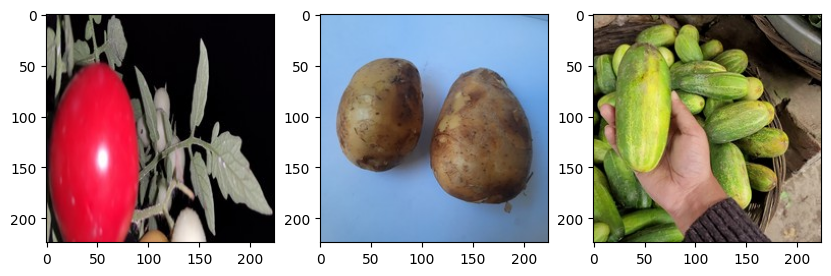

In [21]:
fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(10,5))

ax[0].imshow(X_val[0])
ax[1].imshow(X_val[205])
ax[2].imshow(X_val[500])

# Test Data Preprocessing

In [22]:
# Test Data

Tomato = list(test_dir.glob('Tomato/*'))
Potato = list(test_dir.glob('Potato/*'))
Cucumber = list(validation_dir.glob('Cucumber/*'))

test_images = {
    'Tomato':Tomato,
    'Potato':Potato,
    'Cucumber':Cucumber
}

test_labels = {
    'Tomato':0,
    'Potato':1,
    'Cucumber':2
}

X_test, y_test = [], []  # X = images, y = labels
for label, images in test_images.items():
    for image in images:
        img = Image.open(image)
        X_test.append(np.array(img))
        y_test.append(test_labels[label])


# Standardize
X_test = np.array(X_test, dtype='float32') / 255.0
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = to_categorical(y_test)

print(X_test.shape)
print(y_test.shape)

(600, 224, 224, 3)
(600,)
(600, 224, 224, 3)
(600, 3)


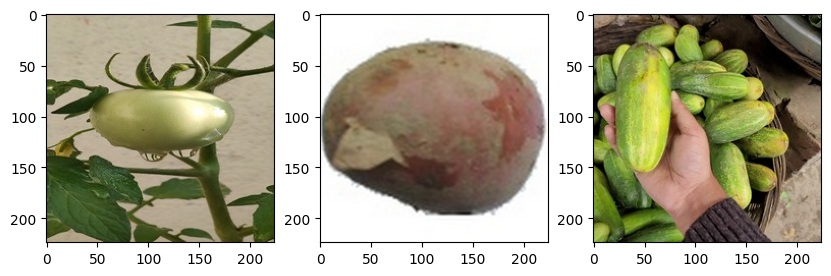

In [23]:
fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(10,5))

ax[0].imshow(X_test[0])
ax[1].imshow(X_test[205])
ax[2].imshow(X_test[500])

# Model Building

In [24]:
cnn = Sequential()

cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(224,224,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(512,activation = 'relu'))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(3,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

# Training the model

In [25]:
history = cnn.fit(X_train,y_train,epochs=25,validation_data=(X_val,y_val))

Epoch 1/25
94/94 [==============================] - 23s 132ms/step - loss: 0.8438 - accuracy: 0.5833 - val_loss: 0.9719 - val_accuracy: 0.7517
Epoch 2/25
94/94 [==============================] - 9s 96ms/step - loss: 0.3048 - accuracy: 0.9087 - val_loss: 0.1819 - val_accuracy: 0.9233
Epoch 3/25
94/94 [==============================] - 9s 99ms/step - loss: 0.2578 - accuracy: 0.9210 - val_loss: 0.6197 - val_accuracy: 0.8433
Epoch 4/25
94/94 [==============================] - 9s 99ms/step - loss: 0.1865 - accuracy: 0.9443 - val_loss: 0.2231 - val_accuracy: 0.9183
Epoch 5/25
94/94 [==============================] - 9s 96ms/step - loss: 0.1695 - accuracy: 0.9507 - val_loss: 0.1124 - val_accuracy: 0.9733
Epoch 6/25
94/94 [==============================] - 9s 99ms/step - loss: 0.1146 - accuracy: 0.9693 - val_loss: 0.1126 - val_accuracy: 0.9650
Epoch 7/25
94/94 [==============================] - 9s 97ms/step - loss: 0.0890 - accuracy: 0.9737 - val_loss: 0.0671 - val_accuracy: 0.9817
Epoch 8/25


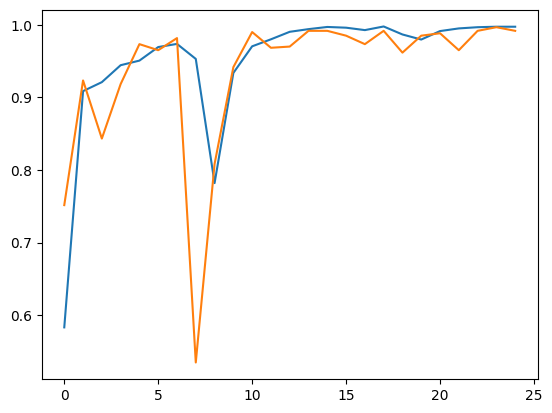

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Evaluating the model using test data

In [27]:
cnn.evaluate(X_test,y_test)

19/19 [==============================] - 1s 27ms/step - loss: 0.0405 - accuracy: 0.9950


[0.040506429970264435, 0.9950000047683716]

# Test Input : 1

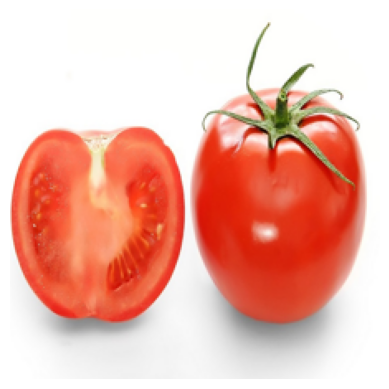

In [28]:
# Load the image
img_path = '/content/tomato.jpg'
img = Image.open(img_path)
img = img.resize((224, 224)) # Resize the image to (224, 224)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
# Convert the image to a numpy array
img_array = np.array(img)
print("Image Shape:", img_array.shape)

img_array = np.array(img) / 255.0 # Normalize the array

# Display the shape of the normalized image array
print("Image Shape (normalized):", img_array.shape)

predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

predicted_index = np.argmax(predictions)  # Get the index of the maximum value

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Cucumber'

print("Predicted Class:", predicted_class)



Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 1s 651ms/step
[[1.0000000e+00 4.5457696e-25 9.1845101e-29]]
Predicted Class: Tomato


# Test Input : 2

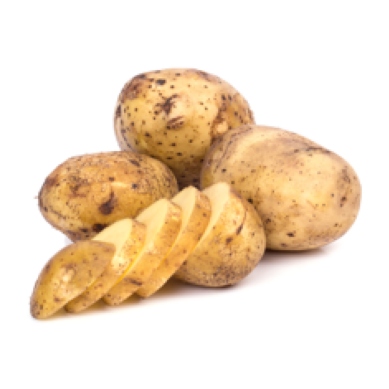

In [30]:
# Load the image
img_path = '/content/drive/MyDrive/Data/potato-table.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
img_array = np.array(img)
print("Image Shape:", img_array.shape)

img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

predicted_index = np.argmax(predictions)

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Cucumber'

print("Predicted Class:", predicted_class)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 0s 25ms/step
[[3.0452445e-06 9.9999690e-01 1.9438183e-08]]
Predicted Class: Potato


# Test Input : 3

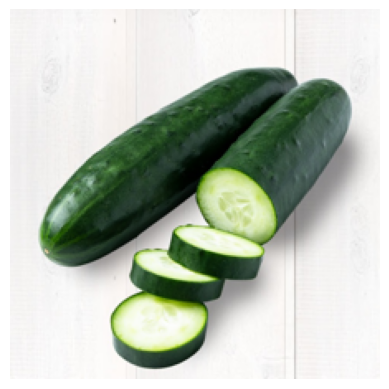

In [32]:
# Load the image
img_path = '/content/cucumber.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
plt.imshow(img)   # Display
plt.axis('off')
plt.show()

In [33]:
# Convert the image to a numpy array
img_array = np.array(img)
print("Image Shape:", img_array.shape)
img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)


In [34]:
predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

1/1 [==============================] - 0s 22ms/step
[[1.5961048e-10 3.4490834e-17 1.0000000e+00]]


In [35]:
predicted_index = np.argmax(predictions)

if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Cucumber'

print("Predicted Class:", predicted_class)

Predicted Class: Cucumber
